# *Merged Jupyter Notebook*

<hr><font color="green"><h1>from file: Crawling</h1></font>

# Part 1: Data Acquisition

At this part, I will acquire data by using the crawling method.
I will crawl the **National Centers for Environmenal Information** site - "https://www.ncdc.noaa.gov/stormevents/choosedates.jsp?statefips=-999,ALL"

Import necessary packages

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from time import sleep

In [ ]:
# This function create and return a soup object for a given html file.    
def getHtml(url):
    html = requests.get(url)
    soup = BeautifulSoup(html.content, "html.parser")
    return soup.prettify()

In [ ]:
# This function return the table in html file.
def getTable(html, numOfTable):
    try:
        table = html.find_all(lambda tag: tag.name == 'table')[numOfTable]
    except:
        print("An exception occurred: " + table)
    return table

In [ ]:
# This function return all rows in the table
def getRows(table):
    rows = table.find_all('tr')
    return rows

In [ ]:
# This function return all columns in the table
def getCell(rows):
    cell = list()
    for row in rows:
        cells = row.find_all('td')
        if len(cells) == 2:
            cell.append(cells[0].get_text())
            cell.append(cells[1].get_text())
    return cell

In [ ]:
# Thid function get link and  completion to whole address Additionally, remove extra Spaces.
def fixUrls(links):
    url_list = list()
    for link in links:
        url = "https://www.ncdc.noaa.gov/stormevents/"+link
        url_list.append(url.strip())
    return url_list

In the site **National Centers for Environmenal Information** the Tornado storms are divided into time periods, and for each time period we have url address (main_url) with different ID, and for each ID we have html file that contain table with url addrresses (secondry_url) that represent the all Tornado storms in this time period.

In [ ]:
# This function get main url of one page and return all the url in this page. 
def getAllUrl(main_url):
    html = requests.get(main_url)
    soup = BeautifulSoup(html.content, "html.parser")
    main_table = getTable(soup, 1)
    data = main_table.find_all(lambda tag: tag.name == "a")
    links = list()
    for item in data:
        if str(item.get('href')) == "#":
            continue
        links.append(str(item.get('href')))
    url_list = fixUrls(links)
    return url_list

In [ ]:
# This function create list of the years that i want to based on (2010-2022)
def getYearsList(yearsList, startYear, endYear):
    years = range(startYear, endYear)
    for year in years:
        yearsList.append(year)
    return yearsList

In [ ]:
# This function create list of the months (1-12)
def getMonthsList(monthsList, startMonth, endMonth):
    months = range(startMonth, endMonth)
    for month in months:
        monthsList.append(month)
    return monthsList

In [ ]:
# This function return the list of main urls between 2010 to 2021
def getMainUrlBetween2010To2021(yearsList, monthsList):
    list_url = list()
    beginDay = endDay = 1
    for year in yearsList:
        beginYear = endYear = year
        for month in monthsList:
            beginMonth = month
            endMonth = month + 1
            if beginMonth < 9:
                url_by_dates = "https://www.ncdc.noaa.gov/stormevents/listevents.jsp?eventType=%28C%29+Tornado&beginDate_mm=0" + str(beginMonth) + "&beginDate_dd=0" + str(beginDay) + "&beginDate_yyyy=" + str(beginYear) + "&endDate_mm=0" + str(endMonth) + "&endDate_dd=0" + str(endDay) + "&endDate_yyyy=" + str(endYear) + "&hailfilter=0.00&tornfilter=0&windfilter=000&sort=DT&submitbutton=Search&statefips=-999%2CALL"
                list_url.append(url_by_dates)
            if beginMonth == 9:
                url_by_dates = "https://www.ncdc.noaa.gov/stormevents/listevents.jsp?eventType=%28C%29+Tornado&beginDate_mm=0" + str(beginMonth) + "&beginDate_dd=0" + str(beginDay) + "&beginDate_yyyy=" + str(beginYear) + "&endDate_mm=" + str(endMonth) + "&endDate_dd=0" + str(endDay) + "&endDate_yyyy=" + str(endYear) + "&hailfilter=0.00&tornfilter=0&windfilter=000&sort=DT&submitbutton=Search&statefips=-999%2CALL"
                list_url.append(url_by_dates)
            if beginMonth > 9:
                url_by_dates = "https://www.ncdc.noaa.gov/stormevents/listevents.jsp?eventType=%28C%29+Tornado&beginDate_mm=" + str(beginMonth) + "&beginDate_dd=0" + str(beginDay) + "&beginDate_yyyy=" + str(beginYear) + "&endDate_mm=" + str(endMonth) + "&endDate_dd=0" + str(endDay) + "&endDate_yyyy=" + str(endYear) + "&hailfilter=0.00&tornfilter=0&windfilter=000&sort=DT&submitbutton=Search&statefips=-999%2CALL"
                list_url.append(url_by_dates)
    return (list_url)

In [ ]:
# This function return the list of main urls in 2022
def getMainUrlIn2022(yearsList, monthsList):
    list_url = list()
    beginDay = endDay = 1
    for year in yearsList:
        beginYear = endYear = year
        for month in monthsList:
            beginMonth = month
            endMonth = month + 1
            url_by_dates = "https://www.ncdc.noaa.gov/stormevents/listevents.jsp?eventType=%28C%29+Tornado&beginDate_mm=0" + str(beginMonth) + "&beginDate_dd=0" + str(beginDay) + "&beginDate_yyyy=" + str(beginYear) + "&endDate_mm=0" + str(endMonth) + "&endDate_dd=0" + str(endDay) + "&endDate_yyyy=" + str(endYear) + "&hailfilter=0.00&tornfilter=0&windfilter=000&sort=DT&submitbutton=Search&statefips=-999%2CALL"
            list_url.append(url_by_dates)
    return list_url


In [ ]:
# This function create list that contain all secondry urls between 2010 to 2022
def getSecondaryUrls2010to2022(yearsList, monthsList, yearsList2022, monthsList2022):
    mainUrls = list()
    secondaryUrls = list()
    mainUrls = getMainUrlBetween2010To2021(yearsList, monthsList)
    mainUrls.extend(getMainUrlIn2022(yearsList2022, monthsList2022))
    for url in mainUrls:
        secondaryUrls.extend(getAllUrl(url))
    return secondaryUrls

In [ ]:
# This function return list with data on torndo storms - 2010-2022
def getData(listOfCells, nameOfcells):
    dataList = list()
    lenNameOfCells = len(nameOfcells)
    lenListOfCells = len(listOfCells)
    for i in range(lenNameOfCells):
        for j in range(0, lenListOfCells, 2):
            if listOfCells[j] == nameOfcells[i]:
               dataList.append(listOfCells[j+1])
    dataList = addNaN(dataList, listOfCells, lenNameOfCells, nameOfcells)
    return dataList

In the site we have different tables in the part of torndo storms, so to avoid incompatibility I put NaN

In [ ]:
# This function add NaN in missing places
def addNaN(dataList, listOfCells, lenNameOfCells, nameOfcells):
    for j in range(lenNameOfCells):
        b = nameOfcells[j]
        if b not in listOfCells:
            dataList.insert(j, np.nan)
    return dataList

In [ ]:
# This function create the dataframe and load to csv
def createDataFrame(secondaryUrls, nameOfcells):
    dataList = list()
    listOfCells = list()
    scale = list()
    length = list()
    width = list()
    state = list()
    beginDate = list()
    beginLatLon = list()
    deaths = list()
    numOfTable = 0
    for url in secondaryUrls:
        print(url)
        i = 0
        try:
            html = requests.get(url)
        except:
            print("An exception occurred: " + url)
        sleep(1)
        soup = BeautifulSoup(html.content, "html.parser")
        table = getTable(soup, numOfTable)
        rows = getRows(table)
        listOfCells = getCell(rows)
        dataList = getData(listOfCells, nameOfcells)
        scale.insert(i, dataList[0])
        length.insert(i, dataList[1])
        width.insert(i, dataList[2])
        state.insert(i, dataList[3])
        beginDate.insert(i, dataList[4])
        beginLatLon.insert(i, dataList[5])
        deaths.insert(i, dataList[6])
        i = i + 1

    df = pd.DataFrame({'Scale': scale, 'Length': length, 'Width': width, 'Country': state, 'Begin Date': beginDate, 'Begin Lat/Lon': beginLatLon, 'Deaths Direct/Indirect': deaths})
    df.to_csv('TornadoTable.csv', mode='a', index=False, header=True)

# Main

In [ ]:
 nameOfCells = ['-- Scale', '-- Length', '-- Width', 'State', 'Begin Date', 'Begin Lat/Lon', 'Deaths Direct/Indirect']
 monthsList = list()z
 yearsList = list()
 secondaryUrls = list()
 yearsList = getYearsList(yearsList, 2010, 2022)
 monthsList = getMonthsList(monthsList, 1, 12)
 yearsList2022 = [2022]
 monthsList2022 = [1, 2, 3, 4, 5]
 secondaryUrls = getSecondaryUrls2010to2022(yearsList, monthsList, yearsList2022, monthsList2022)
 createDataFrame(secondaryUrls, nameOfCells)

<hr><font color="green"><h1>from file: Data Cleaning</h1></font>

# Part 2: Data Cleaning

In this part I will remove all unnecessary columns, and I will add necessary columns.
The columns that will be after this part are:
* Scale
* years
* Length
* Width
* Country
* Latitude
* Longtitude
* Deaths

Import necessary packages

In [1]:
import pandas as pd
import numpy as np

**This function removes all unnecessary columns**

In [2]:
def removeColumns(df, columnsToRemove):
    for column in columnsToRemove:
        df.drop(column, inplace=True, axis=1)
    return df

**These functions handling with missing data**

In [3]:
# This function removes all rows that contain an unkown scale (EFU) 
def removeRowsWithEFU(df):
    df = df[df["Scale"].str.contains("EFU") == False]
    return df

In [4]:
# This function removes all rows that contain NaN value
def removeRowsWithNaN(df):
    df = df.dropna(axis=0, how='any')
    return df

**This function handling with duplicates**

In [5]:
# This function removes the rows that appear more than once and leaves one copy
def removeDuplicates(df):
    df = df.drop_duplicates()
    return df

**Add NaN columns to create a new column**

In [6]:
def addNaNColumns(df, place_number, column_name):
    df.insert(loc=place_number, column=column_name, value=np.nan)
    return df

**Handling with columns that contain two different values in one column**

In [7]:
# This function takes the death direct value from Deaths Direct/Indirect column
def fixedDeathsColumn(df, numberOfRow):
    value = df.iloc[numberOfRow]['Deaths Direct/Indirect']
    deaths = value[0]
    return deaths

In [8]:
# This function fill the the death column with the values that we took from the Deaths Direct/Indirect column
def fillDeaths(df):
    for numberOfRow in range(len(df)):
        deaths = fixedDeathsColumn(df, numberOfRow)
        df.loc[df.index[numberOfRow], 'Deaths'] = deaths
    return df

In [9]:
# This function take care of the Begin Lat/Lon column and return the latitude and longtitude values separately
def fixedLatAndLon(df, numberOfRow):
    longtitude = list()
    latitude = list()
    flag = 0
    value = df.iloc[numberOfRow]['Begin Lat/Lon']
    for x in value:
        if x != '/' and flag == 0:
            latitude.extend(x)
        if x == '/':
            flag = 1
            continue
        if flag == 1:
            longtitude.extend(x)

    return [latitude, longtitude]

In [10]:
# This function fill the latitude and longtitude columns with the values that we took from the Begin Lat/Lon column
def fillLatAndLonColumns(df):
    for numberOfRow in range(len(df)):
        Latitude = ' '
        Longtitude = ' '
        listLatLon = fixedLatAndLon(df, numberOfRow)
        Type_new1 = listLatLon[0]
        Type_new2 = listLatLon[1]
        Latitude = ''.join(map(str, Type_new1))
        Longtitude = ''.join(map(str, Type_new2))
        df.loc[df.index[numberOfRow], 'Latitude'] = Latitude
        df.loc[df.index[numberOfRow], 'Longtitude'] = Longtitude
    return df

In [11]:
# This function take care of Begin Date column and return the year value
def fixedDate(df, number_of_row):
    date = df.iloc[number_of_row]['Begin Date']
    fixedDateList = list()
    for i in date:
        if i == '-':
            break
        else:
            fixedDateList.extend(i)

    fixedDate = ''.join(map(str, fixedDateList))
    return fixedDate

In [12]:
# This function fill the years column with the value that we took from the Begin Date column
def fillColumnYears(df):
    for numberOfRow in range(len(df)):
        year = fixedDate(df, numberOfRow)
        df.loc[df.index[numberOfRow], 'Years'] = year
    return df

**Handling with different units of measurement**

In [13]:
# This function convert yards to meters in width column
def convertYardsToMeters(df):
    value1 = list()
    for row_number in range(len(df)):
        value1.clear()
        value = df.iloc[row_number]['Width']
        for i in value:
            if i == ' ':
                break
            else:
                value1.extend(i)
        value = ''.join(map(str, value1))
        value = float(value) * 0.0009144
        limited_value = round(value, 3)
        df.loc[df.index[row_number], 'Width'] = limited_value
    return df

In [14]:
# This function convert miles to km in length column
def convertMilesToKm(df):
    value1 = list()
    for row_number in range(len(df)):
        value1.clear()
        value = df.iloc[row_number]['Length']
        for i in value:
            if i == ' ':
                break
            else:
                value1.extend(i)
        value = ''.join(map(str, value1))
        value = float(value) * 1.609344
        limited_value = round(value, 3)
        df.loc[df.index[row_number], 'Length'] = limited_value
    return df

In [15]:
# This function convert the scale value from EF to number 
def convertScaleToNumbers(df):
    for numberOfRow in range(len(df)):
        value = df.iloc[numberOfRow]['Scale']
        for i in value:
            if i != 'E' or i != 'F':
                value = i
        df.loc[df.index[numberOfRow], 'Scale'] = value
    return df

# main

**The df before data cleaning:**

In [16]:
df = pd.read_csv("TornadoTable.csv")
df

Scale      Length      Width         Country              Begin Date  \
0       EF1  2.01 Miles  100 Yards    PENNSYLVANIA  2022-03-31 20:48 EST-5   
1       EF0  0.13 Miles   50 Yards        VIRGINIA  2022-03-31 19:41 EST-5   
2       EF0  0.05 Miles   30 Yards        VIRGINIA  2022-03-31 19:22 EST-5   
3       EF1  9.14 Miles  500 Yards    PENNSYLVANIA  2022-03-31 15:38 EST-5   
4       EF1  0.22 Miles  100 Yards  NORTH CAROLINA  2022-03-31 14:49 EST-5   
...     ...         ...        ...             ...                     ...   
15844   EF1  0.79 Miles  150 Yards           TEXAS  2010-01-20 16:26 CST-6   
15845   EF0  0.16 Miles   25 Yards       LOUISIANA  2010-01-20 15:27 CST-6   
15846   EF1  4.62 Miles   25 Yards      CALIFORNIA  2010-01-19 12:55 PST-8   
15847   EF0  0.14 Miles   10 Yards      CALIFORNIA  2010-01-19 10:32 PST-8   
15848   EF0  0.53 Miles   15 Yards      CALIFORNIA  2010-01-18 15:24 PST-8   

          Begin Lat/Lon                           Deaths Direct/Indirect  
0       40.379/-75.2266  0/0 (fatality details below, when available...)  
1      38.9196/-77.2259  0/0 (fatality details below, when available...)  
2      38.8653/-77.4579  0/0 (fatality details below, when available...)  
3          41.16/-76.73  1/0 (fatality details below, when available...)  
4      35.8672/-78.8372  0/0 (fatality details below, when available...)  
...                 ...                                              ...  
15844  31.5095/-93.9232  0/0 (fatality details below, when available...)  
15845   30.815/-92.0455  0/0 (fatality details below, when available...)  
15846   33.716/-118.125  0/0 (fatality details below, when available...)  
15847  34.4248/-119.877  0/0 (fatality details below, when available...)  
15848     36.73/-119.86  0/0 (fatality details below, when available...)  

[15849 rows x 7 columns]

**The df after removes rows with NaN values and duplicates:**

In [17]:
df = removeRowsWithEFU(df)
df = removeRowsWithNaN(df)
df = removeDuplicates(df)
df

Scale      Length      Width         Country              Begin Date  \
0       EF1  2.01 Miles  100 Yards    PENNSYLVANIA  2022-03-31 20:48 EST-5   
1       EF0  0.13 Miles   50 Yards        VIRGINIA  2022-03-31 19:41 EST-5   
2       EF0  0.05 Miles   30 Yards        VIRGINIA  2022-03-31 19:22 EST-5   
3       EF1  9.14 Miles  500 Yards    PENNSYLVANIA  2022-03-31 15:38 EST-5   
4       EF1  0.22 Miles  100 Yards  NORTH CAROLINA  2022-03-31 14:49 EST-5   
...     ...         ...        ...             ...                     ...   
15844   EF1  0.79 Miles  150 Yards           TEXAS  2010-01-20 16:26 CST-6   
15845   EF0  0.16 Miles   25 Yards       LOUISIANA  2010-01-20 15:27 CST-6   
15846   EF1  4.62 Miles   25 Yards      CALIFORNIA  2010-01-19 12:55 PST-8   
15847   EF0  0.14 Miles   10 Yards      CALIFORNIA  2010-01-19 10:32 PST-8   
15848   EF0  0.53 Miles   15 Yards      CALIFORNIA  2010-01-18 15:24 PST-8   

          Begin Lat/Lon                           Deaths Direct/Indirect  
0       40.379/-75.2266  0/0 (fatality details below, when available...)  
1      38.9196/-77.2259  0/0 (fatality details below, when available...)  
2      38.8653/-77.4579  0/0 (fatality details below, when available...)  
3          41.16/-76.73  1/0 (fatality details below, when available...)  
4      35.8672/-78.8372  0/0 (fatality details below, when available...)  
...                 ...                                              ...  
15844  31.5095/-93.9232  0/0 (fatality details below, when available...)  
15845   30.815/-92.0455  0/0 (fatality details below, when available...)  
15846   33.716/-118.125  0/0 (fatality details below, when available...)  
15847  34.4248/-119.877  0/0 (fatality details below, when available...)  
15848     36.73/-119.86  0/0 (fatality details below, when available...)  

[14790 rows x 7 columns]

**The df after remove all unnecessary columns, and add all necessary columns:**

In [18]:
df = addNaNColumns(df, len(df.columns), 'Latitude')
df = addNaNColumns(df, len(df.columns), 'Longtitude')
df = addNaNColumns(df, len(df.columns), 'Deaths')
df = addNaNColumns(df, 1, 'Years')
df = fillDeaths(df)
df = fillLatAndLonColumns(df)
df = fillColumnYears(df)
columns_to_remove = ['Begin Lat/Lon', 'Deaths Direct/Indirect', 'Begin Date']
df = removeColumns(df, columns_to_remove)
df

Scale Years      Length      Width         Country Latitude Longtitude  \
0       EF1  2022  2.01 Miles  100 Yards    PENNSYLVANIA   40.379   -75.2266   
1       EF0  2022  0.13 Miles   50 Yards        VIRGINIA  38.9196   -77.2259   
2       EF0  2022  0.05 Miles   30 Yards        VIRGINIA  38.8653   -77.4579   
3       EF1  2022  9.14 Miles  500 Yards    PENNSYLVANIA    41.16     -76.73   
4       EF1  2022  0.22 Miles  100 Yards  NORTH CAROLINA  35.8672   -78.8372   
...     ...   ...         ...        ...             ...      ...        ...   
15844   EF1  2010  0.79 Miles  150 Yards           TEXAS  31.5095   -93.9232   
15845   EF0  2010  0.16 Miles   25 Yards       LOUISIANA   30.815   -92.0455   
15846   EF1  2010  4.62 Miles   25 Yards      CALIFORNIA   33.716   -118.125   
15847   EF0  2010  0.14 Miles   10 Yards      CALIFORNIA  34.4248   -119.877   
15848   EF0  2010  0.53 Miles   15 Yards      CALIFORNIA    36.73    -119.86   

      Deaths  
0          0  
1          0  
2          0  
3          1  
4          0  
...      ...  
15844      0  
15845      0  
15846      0  
15847      0  
15848      0  

[14790 rows x 8 columns]

In [19]:
df = convertYardsToMeters(df)
df = convertMilesToKm(df)
df = convertScaleToNumbers(df)
df.rename(columns={'Scale': 'Scale (EF)', 'Length': 'Length (KM)', 'Width': 'Width (KM)'}, inplace=True)
df.to_csv('TornadoTableAfterDataCleaning.csv', index=False, header=True)

**The df after data cleaning:**

In [20]:
df = pd.read_csv("TornadoTableAfterDataCleaning.csv")
df

Scale (EF)  Years  Length (KM)  Width (KM)         Country  Latitude  \
0               1   2022        3.235       0.091    PENNSYLVANIA   40.3790   
1               0   2022        0.209       0.046        VIRGINIA   38.9196   
2               0   2022        0.080       0.027        VIRGINIA   38.8653   
3               1   2022       14.709       0.457    PENNSYLVANIA   41.1600   
4               1   2022        0.354       0.091  NORTH CAROLINA   35.8672   
...           ...    ...          ...         ...             ...       ...   
14785           1   2010        1.271       0.137           TEXAS   31.5095   
14786           0   2010        0.257       0.023       LOUISIANA   30.8150   
14787           1   2010        7.435       0.023      CALIFORNIA   33.7160   
14788           0   2010        0.225       0.009      CALIFORNIA   34.4248   
14789           0   2010        0.853       0.014      CALIFORNIA   36.7300   

       Longtitude  Deaths  
0        -75.2266       0  
1        -77.2259       0  
2        -77.4579       0  
3        -76.7300       1  
4        -78.8372       0  
...           ...     ...  
14785    -93.9232       0  
14786    -92.0455       0  
14787   -118.1250       0  
14788   -119.8770       0  
14789   -119.8600       0  

[14790 rows x 8 columns]

<hr><font color="green"><h1>from file: Eda</h1></font>

# Part 3: EDA 
In this part I will create the EDA from the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# This function create pie chart of the scale column and show us how many tornadoes in each scale we have had
def createPieChartOfScale(df):
    scaleArray = [0, 0, 0, 0, 0]
    for numberOfRow in range(len(df)):
        scaleNumber = df.iloc[numberOfRow]['Scale (EF)']
        if scaleNumber == 4 or scaleNumber == 5:
            scaleArray[4] += 1
        else:
            scaleArray[scaleNumber] += 1
    x = np.array(scaleArray)
    explode = (0.2, 0.2, 0.2, 0.2, 0.3) 
    mylabels = ["EF0", "EF1", "EF2", "EF3", "EF4/5"]
    sliceColors = ['#008cff','#db0d0d','#ebe307','#14f200', '#e600ff']
    plt.pie(x, explode=explode, labels=mylabels, colors=sliceColors, autopct='%1.1f%%', shadow=True)
    plt.legend()
    plt.title("Pie chart of Scale\n")
    plt.show()

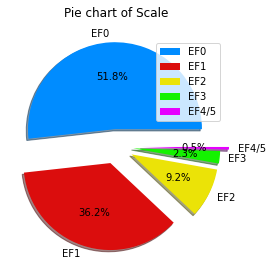

In [3]:
df = pd.read_csv("TornadoTableAfterDataCleaning.csv")
createPieChartOfScale(df)

From this pie chart we can see that tornado storms with EF0 scale is the most common and EF4/5 is the less common

In [4]:
# This function create heat map from Scale (EF), Length (KM), Width (M), Latitude, Longtitude and years columns
def createHeatMap(df):
    plt.figure(figsize=(10, 10))
    heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
    heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 18}, pad=12)
    #plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')
    plt.show()

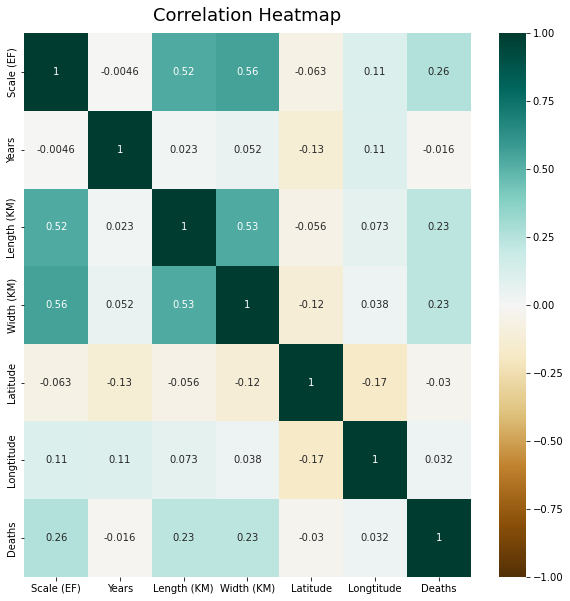

In [5]:
createHeatMap(df)

In [6]:
# This function create bar plot of Scale column by Length
def barPlotScaleByLength(df, nameOfColumn, yLim):
    new_df = df[['Scale (EF)', nameOfColumn]].copy()
    scale_df = df.groupby('Scale (EF)')[nameOfColumn].mean()
    scale_df.plot(kind='bar', figsize=(10, 5), color='#be185d')
    plt.ylim(0, yLim)
    plt.title('Bar Plot of Scale column by Length \n')
    plt.show()

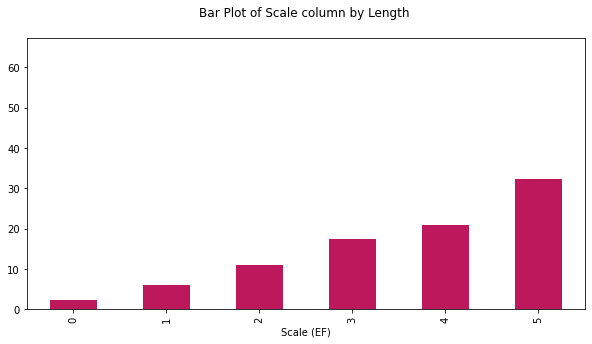

In [7]:
maxYLimOfLength = df['Length (KM)'].max()
barPlotScaleByLength(df, 'Length (KM)',maxYLimOfLength)

In [8]:
# This function create bar plot of Scale column by Width
def barPlotScaleByWidth(df, nameOfColumn, yLim):
    new_df = df[['Scale (EF)', nameOfColumn]].copy()
    scale_df = df.groupby('Scale (EF)')[nameOfColumn].mean()
    scale_df.plot(kind='bar', figsize=(10, 5), color='#0d9488')
    plt.ylim(0, yLim)
    plt.title('Bar Plot of Scale column by Width \n')
    plt.show()

From this bar plot we can see the influence of the width on scale 

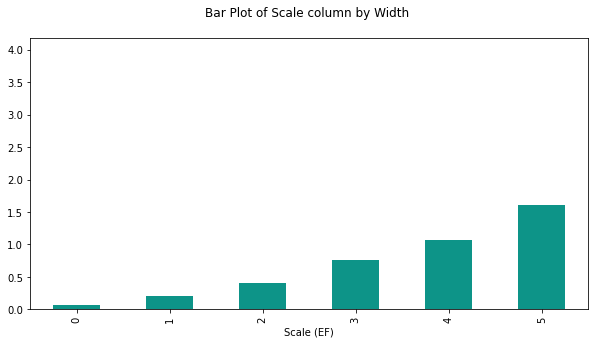

In [9]:
maxYLimOfWidth = df['Width (KM)'].max()
barPlotScaleByWidth(df, 'Width (KM)',maxYLimOfWidth)

From this bar plot we can see the influence of the length on scale 

In [10]:
# This function create bar plot of Scale and Deaths 
def deathsAndScale(df):
    new_df = df[['Scale (EF)', 'Deaths']].copy()
    scale_df = new_df.groupby(['Scale (EF)']).mean()
    scale_df.plot(kind='line', figsize=(8, 4), color='#002aff')
    maxDeaths = df['Deaths'].max()
    plt.ylim(0, maxDeaths)
    plt.title('Bar plot of Scale and Deaths \n')
    plt.show()

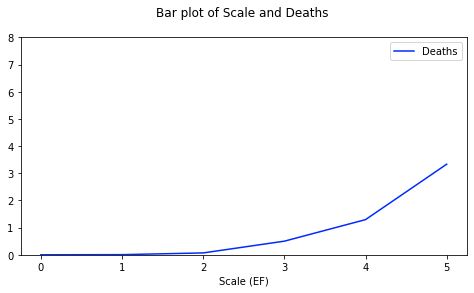

In [11]:
deathsAndScale(df)

From this bar plot we can see the influence of the scale on the number of deaths.
EF5 is the scale with the most deats.

In [12]:
# This function create bar plot that represent the amount of tornadoes per year
def tornadoesPerYear(df):
    new_df = df.Years.value_counts(ascending=True)
    new_df.plot(kind='bar', figsize=(10, 5), color='#6f00ff')
    plt.title('The amount of tornadoes per year \n')
    plt.show()

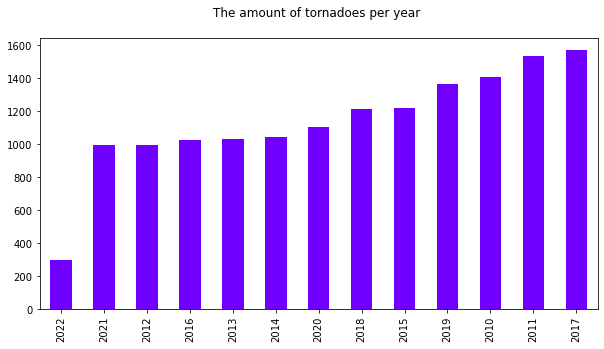

In [13]:
tornadoesPerYear(df)

From this bar plot we can see that 2017 is the year with the most tornado storms

In [14]:
# This function create bar plot that represent the amount of tornadoes per country
def tornadoesPerCountry(df):
    new_df = df.Country.value_counts(ascending=True)
    new_df.plot(kind='bar', figsize=(15, 10), color='#f87171')
    plt.title('The amount of tornadoes per country \n')
    plt.show()

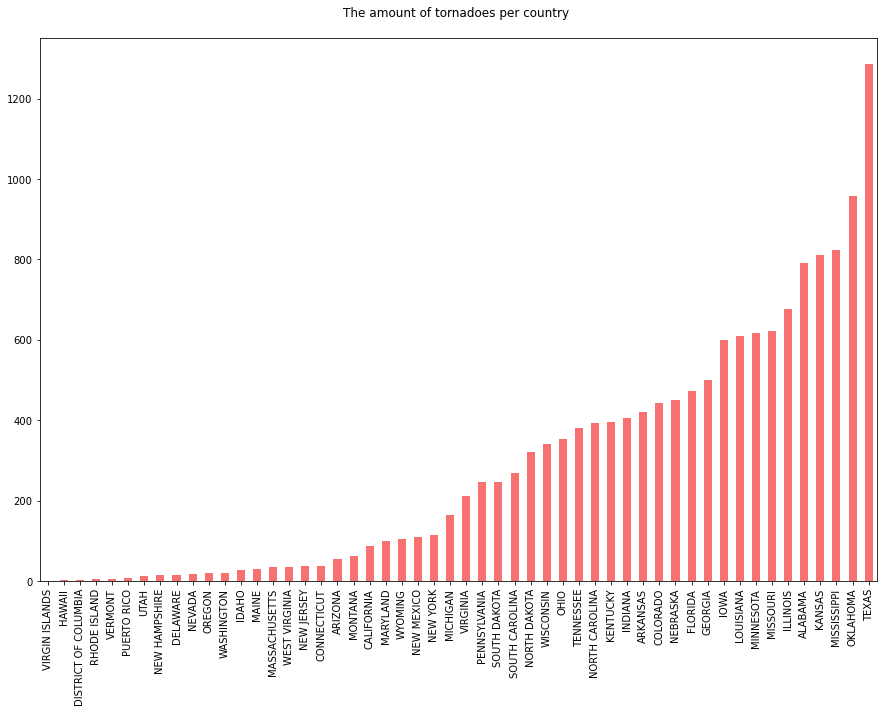

In [15]:
tornadoesPerCountry(df)

From this bar plot we can see that Texas is the country with the most tornado storms 

In [16]:
def scatterPlotOfLonAndLan(df):
    df.plot.scatter(x = 'Longtitude', y = 'Latitude')
    plt.show()

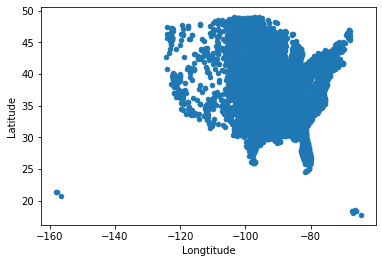

In [17]:
scatterPlotOfLonAndLan(df)

From this plot we can the distribution of tornado storms by latitude and longtitude

In [18]:
def CountryAndScale(df):
    new_df = df[['Scale (EF)', 'Country']].copy()
    new_df = new_df.groupby('Country')['Scale (EF)'].mean()
    new_df.plot(kind='bar', figsize=(20, 20), color='#002aff')
    plt.title('Bar plot of Scale and Deaths \n')
    plt.show()

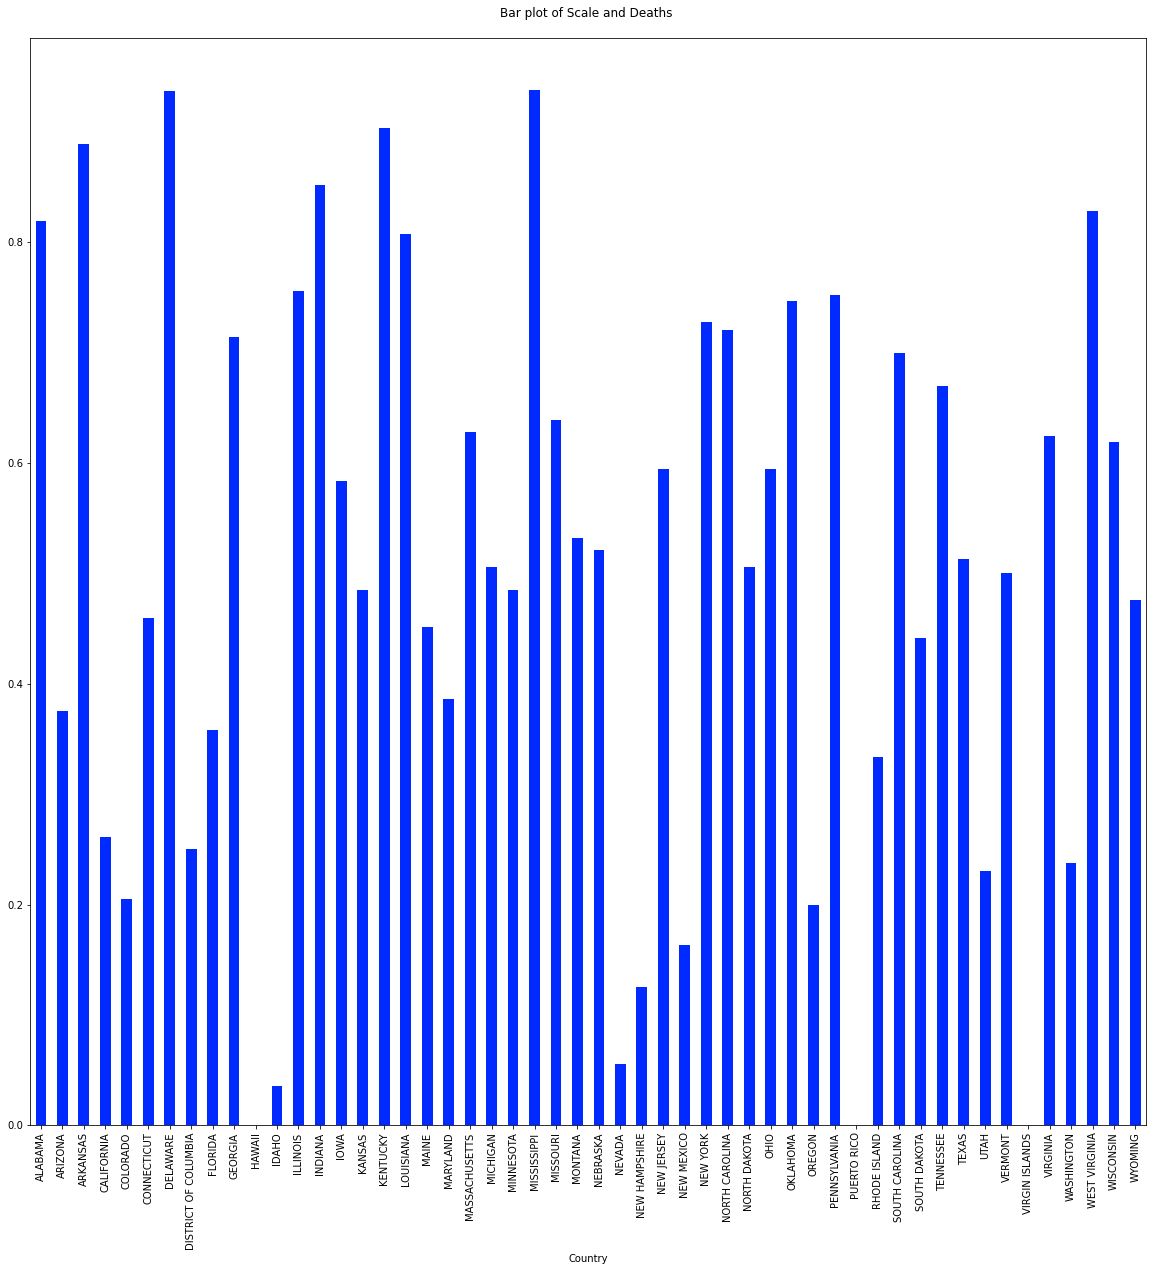

In [19]:
CountryAndScale(df)

<hr><font color="green"><h1>from file: Modeling</h1></font>

# Part 4: Machine Learning
In this part I will use machine learning to verify my research.
I have chosen in Supervised Learning.
My goal is to predict the scale of tornado storms.



Import necessary packages

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import r2_score, accuracy_score, classification_report
from sklearn.metrics import make_scorer

First of all, I need to convert categorial values to numeric values.

In [2]:
# This function convert str values of country column to numeric values
def convertCountryToNumber(df):
    list_of_country = df['Country'].unique().tolist()
    a_list = list(range(0, len(list_of_country)))
    dictionry = dict(zip(list_of_country, range(len(a_list))))
    df.replace({'Country': dictionry }, inplace=True)

In [3]:
df = pd.read_csv("TornadoTableAfterDataCleaning.csv")
convertCountryToNumber(df)
df.to_csv('new.csv', index=False, header=True)
df = pd.read_csv("new.csv")
print("The df after convert categorical values to numeric values")
df

The df after convert categorical values to numeric values


Scale (EF)  Years  Length (KM)  Width (KM)  Country  Latitude  \
0               1   2022        3.235       0.091        0   40.3790   
1               0   2022        0.209       0.046        1   38.9196   
2               0   2022        0.080       0.027        1   38.8653   
3               1   2022       14.709       0.457        0   41.1600   
4               1   2022        0.354       0.091        2   35.8672   
...           ...    ...          ...         ...      ...       ...   
14785           1   2010        1.271       0.137       10   31.5095   
14786           0   2010        0.257       0.023        6   30.8150   
14787           1   2010        7.435       0.023       29   33.7160   
14788           0   2010        0.225       0.009       29   34.4248   
14789           0   2010        0.853       0.014       29   36.7300   

       Longtitude  Deaths  
0        -75.2266       0  
1        -77.2259       0  
2        -77.4579       0  
3        -76.7300       1  
4        -78.8372       0  
...           ...     ...  
14785    -93.9232       0  
14786    -92.0455       0  
14787   -118.1250       0  
14788   -119.8770       0  
14789   -119.8600       0  

[14790 rows x 8 columns]

Before the machine learning algorithm, I need to choose the Training_Features and the target_column.
In my case, the Training_Features is all dataframe except for scale (EF) column and the target_column is the scale (EF) column.

In [4]:
# This function return X that represent Training_Features and y that represent target_column
def load_dataset(df, target_column):
    Training_Features = df.columns[df.columns != target_column]
    X = df[Training_Features]
    y = df[target_column]
    return X, y

After I get the values X and y I need split the data to X_train, X_test, y_train, y_test 

In [5]:
# This function get X and y and return X_train, X_test, y_train, y_test after split
def split_to_train_and_test(X, y, test_ratio, rand_state):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=rand_state)
    return X_train, X_test, y_train, y_test

In [6]:
# This function return the predicted value
def predictSt(trained_1st_model, X_test):
    predicted_vals = trained_1st_model.predict(X_test)
    return predicted_vals

In [7]:
target_col_name = 'Scale (EF)'
X, y = load_dataset(df, target_col_name)
print("X and y:\n")
print(X, y)
X_train, X_test, y_train, y_test = split_to_train_and_test(X, y, 0.3, 43)
print("\n")
print(X_train, X_test, y_train, y_test)

X and y:

       Years  Length (KM)  Width (KM)  Country  Latitude  Longtitude  Deaths
0       2022        3.235       0.091        0   40.3790    -75.2266       0
1       2022        0.209       0.046        1   38.9196    -77.2259       0
2       2022        0.080       0.027        1   38.8653    -77.4579       0
3       2022       14.709       0.457        0   41.1600    -76.7300       1
4       2022        0.354       0.091        2   35.8672    -78.8372       0
...      ...          ...         ...      ...       ...         ...     ...
14785   2010        1.271       0.137       10   31.5095    -93.9232       0
14786   2010        0.257       0.023        6   30.8150    -92.0455       0
14787   2010        7.435       0.023       29   33.7160   -118.1250       0
14788   2010        0.225       0.009       29   34.4248   -119.8770       0
14789   2010        0.853       0.014       29   36.7300   -119.8600       0

[14790 rows x 7 columns] 0        1
1        0
2        0
3      

**Machine learning with use in LinearRegression**

In [8]:
# This function return the trained_model after use in LinearRegression algorithm
def train1stModelLinearRegression(X_train, y_train):
    predictor = LinearRegression(n_jobs=-1)
    trained_model = predictor.fit(X_train, y_train)
    return trained_model

In [9]:
# This function print the accuracy 
def LinearRegressionAlgo(target_col_name,X_train, X_test, y_train, y_test):
    trained_model = train1stModelLinearRegression(X_train, y_train)
    pred_value = predictSt(trained_model, X_test)
    y_pred = pd.Series(pred_value,index=X_test.index)
    evaluate_value = r2_score(y_test, y_pred)
    print(evaluate_value)

**The result after LinearRegression Algorithm:**

In [10]:
LinearRegressionAlgo(target_col_name,X_train, X_test, y_train, y_test)

0.4099282454405827


We can see that LinearRegression Algorithm gives us worst result, so I try to use in different algorithms.

**Machine learning with use in DecisionTree  Algorithm**

In [11]:
def train2stModelDecisionTreeClassifier(X_train, y_train):
    predictor = DecisionTreeClassifier(max_depth =4)
    trained_model = predictor.fit(X_train, y_train)
    return trained_model

In [12]:
def DecisionTreeClassifierAlgo(target_col_name,X_train, X_test, y_train, y_test):
    trained_model = train2stModelDecisionTreeClassifier(X_train, y_train)
    pred_value = predictSt(trained_model, X_test)
    y_pred = pd.Series(pred_value,index=X_test.index)
    evaluate_value = accuracy_score(y_test, y_pred)
    print(evaluate_value)

**The result after DecisionTree Algorithm:**

In [13]:
DecisionTreeClassifierAlgo(target_col_name,X_train, X_test, y_train, y_test)

0.664412891593419


**Machine learning with use in KNeighborsClassifier Algorithm**

In [14]:
def train3stModelKNeighborsClassifier(X_train, y_train):
    predictor = KNeighborsClassifier(n_neighbors = 15)
    trained_model = predictor.fit(X_train, y_train)
    return trained_model

In [15]:
def KNeighborsClassifierAlgo(target_col_name,X_train, X_test, y_train, y_test):
    trained_model = train3stModelKNeighborsClassifier(X_train, y_train)
    pred_value = predictSt(trained_model, X_test)
    y_pred = pd.Series(pred_value,index=X_test.index)
    evaluate_value = accuracy_score(y_test, y_pred)
    print(evaluate_value)

**The result after KNN Algorithm:**

In [16]:
KNeighborsClassifierAlgo(target_col_name,X_train, X_test, y_train, y_test)

0.6294793779580797


**Machine learning with use in RandomForest Algorithm**

In [17]:
def train4stModelRandomForestClassifier(X_train, y_train):
    predictor = RandomForestClassifier(n_estimators=51)
    trained_model = predictor.fit(X_train, y_train)
    return trained_model

In [18]:
def RandomForestClassifierAlgo(target_col_name,X_train, X_test, y_train, y_test):
    trained_model = train4stModelRandomForestClassifier(X_train, y_train)
    pred_value = predictSt(trained_model, X_test)
    y_pred = pd.Series(pred_value,index=X_test.index)
    evaluate_value = accuracy_score(y_test, y_pred)
    print(evaluate_value)

**The result after RandomForest Algorithm:**

In [19]:
RandomForestClassifierAlgo(target_col_name,X_train, X_test, y_train, y_test)

0.6864998873112463


So, We can see that RandomForest Algorithm gives us the best accuracy with 69% success